In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import parallel_coordinates

from scipy.stats import pearsonr
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import RobustScaler
from sklearn.manifold import TSNE

In [2]:
df= pd.read_pickle('./item_selected_by_middleline.pkl')

In [3]:
df_raw= pd.read_table('./Pre_processed_data/merged_dataframe_shopping.csv', delimiter= ',', encoding='euc-kr')

In [4]:
df_feature= df_raw[df_raw['PD_M_NM'].isin(df.columns.values.tolist())][['PD_H_NM', 'PD_M_NM']].drop_duplicates()

In [5]:
df_feature.to_pickle('features_by_middleline.pkl')

In [6]:
df.head()

,H&B선물세트,VIDEOGAME,가공식품,가공우유,가구,가방브랜드,계절완구,고급,고양이용품,골프,...,필기용품,한방차,한우선물세트,해초,헬스용품,호주산소고기,홍인삼,화과자,황태,훼이셜케어
ID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
4,0.0,0.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,14.0,0.0,1.0,0.0,0.0


In [7]:
df_feature.head(10)

,PD_H_NM,PD_M_NM
6,식품,가공식품
20,잡화,피혁잡화
43,남성의류,남성정장
95,스포츠,골프용품
109,여성의류,시티웨어
211,가전,대형가전
307,과자,스낵
311,수입육,호주산소고기
340,면과자,스낵
415,잡화,준보석/시계


In [8]:
sns.set()

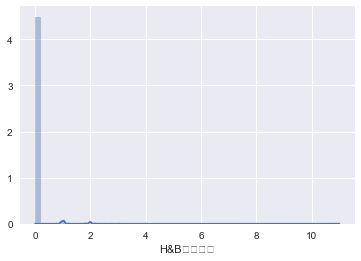

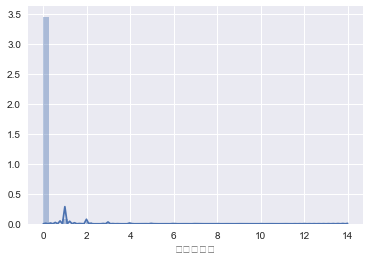

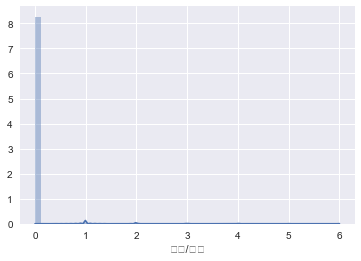

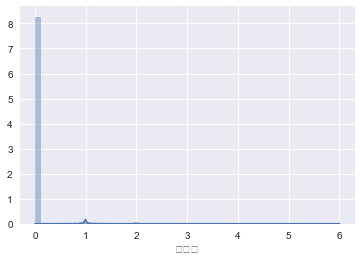

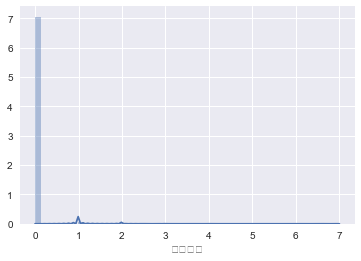

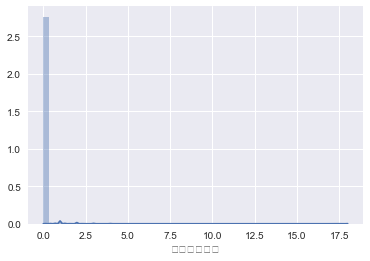

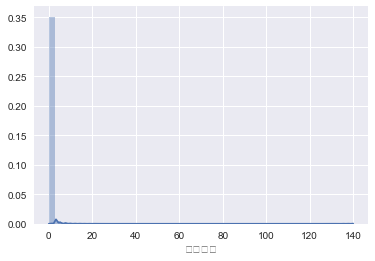

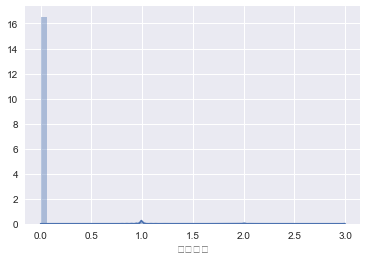

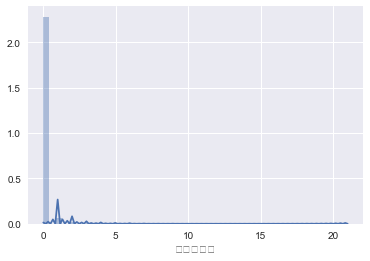

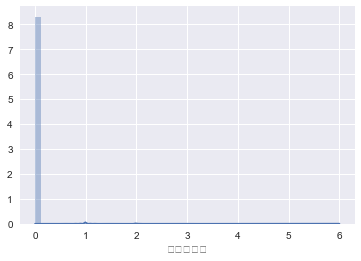

In [9]:
for elmt in df.columns.values.tolist()[:140:14]:
    grp= sns.distplot(df[elmt])
    plt.show()

In [10]:
# df_status= pd.DataFrame(index= df.columns, columns= ['mean', 'std', 'max', 'min'])

In [11]:
# df_status['mean']= df.mean(axis=0)

In [12]:
# df_status['std']= df.std(axis=0)

In [13]:
# df_status['max']= df.max(axis=0)
# df_status['min']= df.min(axis=0)

In [14]:
# df_status.join(df_feature.set_index('PD_M_NM'), how= 'left')

,mean,std,max,min,PD_H_NM
H&B선물세트,0.017520,0.193610,11.0,0.0,구강/헤어
VIDEOGAME,0.021509,0.254393,9.0,0.0,완구
가공식품,12.513208,23.464367,532.0,0.0,식품
가공우유,1.907601,7.863613,336.0,0.0,데일리
가공우유,1.907601,7.863613,336.0,0.0,유음료
가구,0.075094,0.693321,49.0,0.0,인테리어
가구,0.075094,0.693321,49.0,0.0,가정
가방브랜드,0.013908,0.157205,6.0,0.0,잡화브랜드
계절완구,0.004960,0.118289,7.0,0.0,완구
고급,0.061078,0.776279,63.0,0.0,아이스크림


In [15]:
# df_status.to_csv('status_by_middleline.csv')

In [8]:
data_scaled= pd.DataFrame(RobustScaler().fit_transform(df), columns= df.columns)

In [17]:
# data_pca= PCA(n_components=2).fit_transform(data_scaled)

In [18]:
# data_pca= pd.DataFrame(data_pca)

In [19]:
# sns.set()

In [20]:
# sns.jointplot(data_pca.iloc[:,0], data_pca.iloc[:,1], kind= 'scatter')

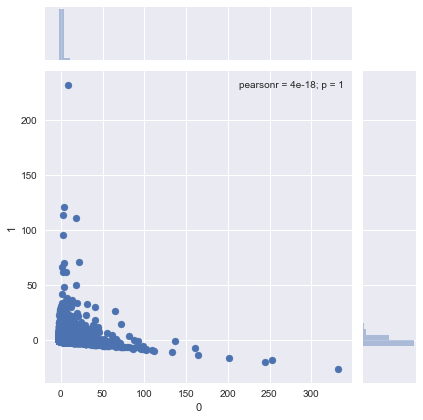

In [21]:
# plt.show()

In [ ]:
sns.set()
data_tsne= {}
for perplexity in [5, 10, 30, 50, 100]:
    data_tsne[perplexity]= TSNE(n_components= 2, init= 'random', random_state= 42, perplexity= perplexity).fit_transform(data_scaled)

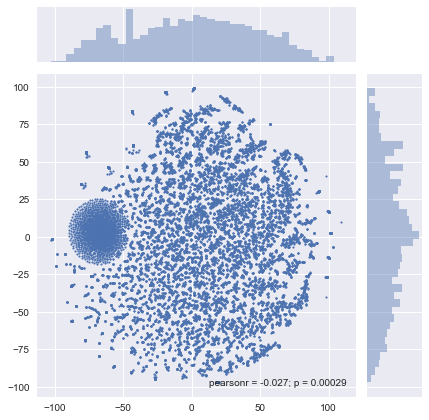

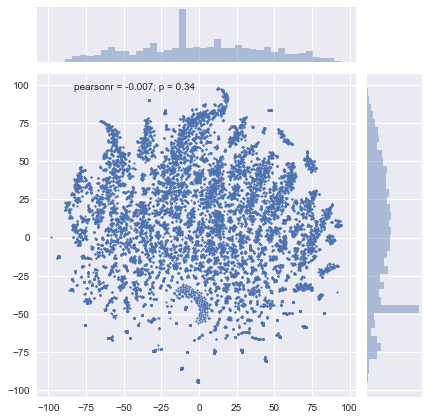

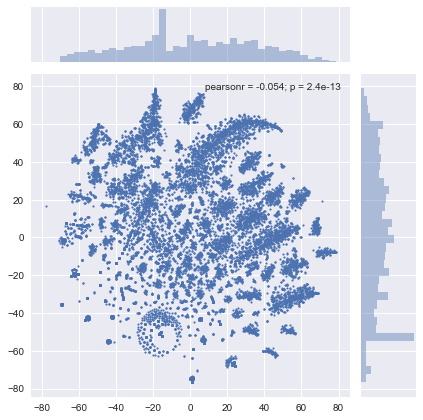

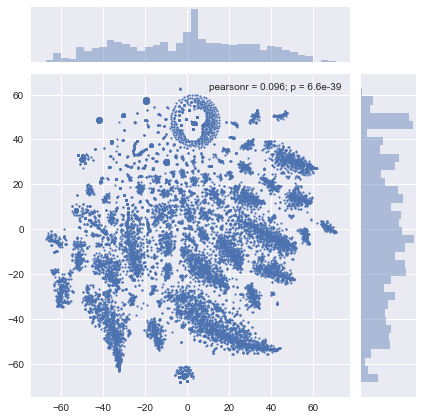

In [20]:
for key, value in data_tsne.items():
    sns.jointplot(value[:,0], value[:,1], kind= 'scatter', s=3)
    plt.show()